In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import random

In [3]:
# =============================
#  Function Definitions
# =============================

def plot(matrix, weights=None, title="Prediction Matrix"):
    """
    Plots the data points along with decision boundary if weights are provided.
    Supports both 1D and 2D feature spaces.
    """
    if len(matrix[0]) == 3:  # Case: 1D input features
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Classifications")

        if weights is not None:  # Plot decision boundary if weights exist
            x_min, x_max = 0.0, 1.1
            y_min, y_max = -0.1, 1.1
            xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.001),
                                 np.arange(y_min, y_max, 0.001))
            zs = np.array([predict([1.0, x], weights) for x in xs.ravel()])
            zs = zs.reshape(xs.shape)
            plt.contourf(xs, ys, zs, levels=[-1, -0.0001, 0, 1], colors=('b', 'r'), alpha=0.1)

        # Separate data points into two classes for visualization
        c1_data, c0_data = [[], []], [[], []]
        for i in range(len(matrix)):
            cur_x, cur_y = matrix[i][1], matrix[i][-1]
            if cur_y == 1:
                c1_data[0].append(cur_x)
                c1_data[1].append(1.0)
            else:
                c0_data[0].append(cur_x)
                c0_data[1].append(0.0)

        plt.scatter(c0_data[0], c0_data[1], s=40.0, c='r', label='Class -1')
        plt.scatter(c1_data[0], c1_data[1], s=40.0, c='b', label='Class 1')
        plt.legend(fontsize=10)
        plt.show()
        return

    if len(matrix[0]) == 4:  # Case: 2D input features
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

        if weights is not None:  # Plot decision boundary if weights exist
            xs, ys = np.meshgrid(np.arange(0.0, 5, 0.1),
                                 np.arange(0.0, 5, 0.1))
            zs = np.array([predict([1.0, x, y], weights) for x, y in zip(xs.ravel(), ys.ravel())])
            zs = zs.reshape(xs.shape)
            plt.contourf(xs, ys, zs, levels=[-1, -0.0001, 0, 1], colors=('b', 'r'), alpha=0.1)

        # Separate data points into two classes for visualization
        c1_data, c0_data = [[], []], [[], []]
        for i in range(len(matrix)):
            cur_x, cur_y, cur_label = matrix[i][1], matrix[i][2], matrix[i][-1]
            if cur_label == 1:
                c1_data[0].append(cur_x)
                c1_data[1].append(cur_y)
            else:
                c0_data[0].append(cur_x)
                c0_data[1].append(cur_y)

        plt.scatter(c0_data[0], c0_data[1], s=40.0, c='r', label='Class -1')
        plt.scatter(c1_data[0], c1_data[1], s=40.0, c='b', label='Class 1')
        plt.legend(fontsize=10)
        plt.show()
        return

    print("Matrix dimensions not supported.")

def GenerateSyntheticFn1(UBx, LBx, N1, N2):
    """
    Generates synthetic 2D data points for two different classes.
    """
    # Generate Class 1
    x1 = (UBx[0] - LBx[0]) / 2 + np.random.rand(1, int(N1)) * ((UBx[0] - LBx[0]) / 2)
    x2 = np.random.rand(1, int(N1)) * (UBx[1] - LBx[1])
    C1 = np.hstack([x1.T, x2.T])

    # Generate Class 2
    x1 = np.random.rand(1, int(N2)) * (UBx[0] - LBx[0]) / 2
    x2 = np.random.rand(1, int(N2)) * (UBx[1] - LBx[1])
    C2 = np.hstack([x1.T, x2.T])

    Patterns = np.vstack([C1, C2])
    Labels = np.r_[np.ones((int(N1), 1)), np.zeros((int(N2), 1))]

    return Patterns, Labels

def predict(inputs, weights):
    """
    Computes weighted sum and applies step function for classification.
    """
    return 1.0 if np.dot(inputs, weights) >= 0 else 0.0

def UpdateWeights(Matrix, weights, l_rate):
    """
    Updates weights using the Perceptron Learning Rule.
    """
    for i in range(len(Matrix)):
        prediction = predict(Matrix[i][:-1], weights)
        error = Matrix[i][-1] - prediction
        weights += l_rate * error * Matrix[i][:-1]
    return weights

def accuracy(Matrix, weights):
    """
    Computes classification accuracy on given dataset.
    """
    correct_preds = sum(predict(row[:-1], weights) == row[-1] for row in Matrix)
    return correct_preds / len(Matrix)

In [5]:
# =============================
#  Generate Synthetic Data
# =============================

np.random.seed(1)
N = 1000  # Number of total samples
dim = 2
UBx, LBx = np.array([5, 5]), np.array([0, 0])
ImbalanceRatio = 0.5
N1, N2 = int(N * ImbalanceRatio), N - int(N * ImbalanceRatio)

Patterns, Labels = GenerateSyntheticFn1(UBx, LBx, N1, N2)

# Prepare dataset
matrix = np.c_[np.ones([Patterns.shape[0], 1]), Patterns, Labels]
np.random.shuffle(matrix)

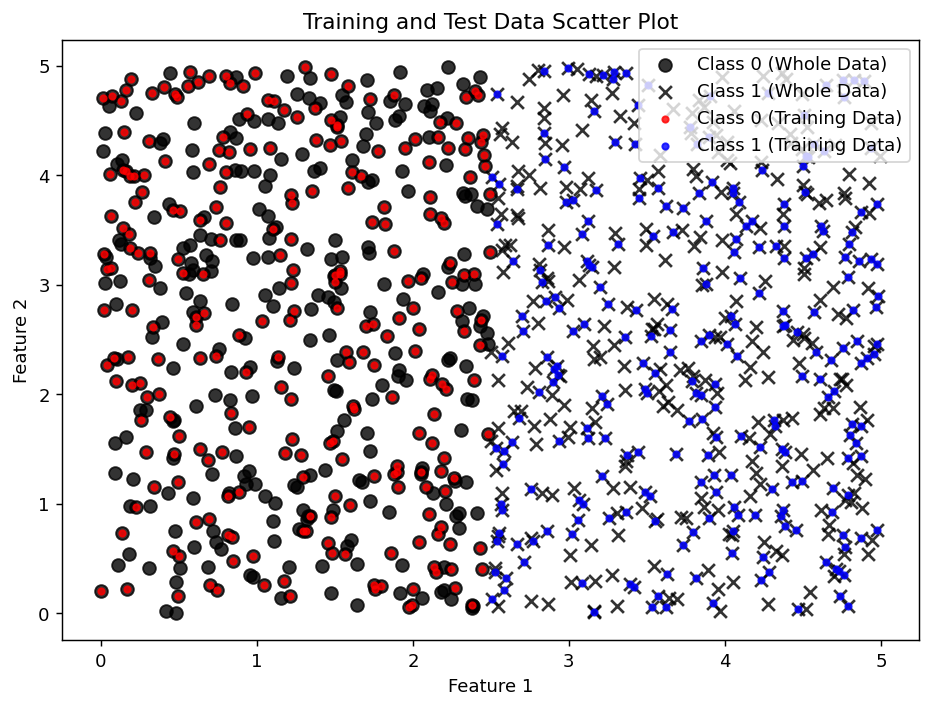

In [7]:
# =============================
#  Train-Test Split
# =============================

train_size = int(0.5 * matrix.shape[0])
TrainingData, TestData = matrix[:train_size, :3], matrix[train_size:, :3]
TrainingLabels, TestLabels = matrix[:train_size, 3], matrix[train_size:, 3]

plt.figure(figsize=(8.5, 6), dpi=130)
# Scatter plot for the entire dataset
plt.scatter(x=matrix[matrix[:, -1] == 0, 1], 
            y=matrix[matrix[:, -1] == 0, 2], 
            color='black', marker='o', s=50, alpha=8/10, label='Class 0 (Whole Data)')

plt.scatter(x=matrix[matrix[:, -1] == 1, 1], 
            y=matrix[matrix[:, -1] == 1, 2], 
            color='black', marker='x', s=50, alpha=8/10, label='Class 1 (Whole Data)')

# Scatter plot for training data
plt.scatter(x=TrainingData[TrainingLabels == 0, 1], 
            y=TrainingData[TrainingLabels == 0, 2], 
            color='red', marker='.', s=50, alpha=8/10, label='Class 0 (Training Data)')

plt.scatter(x=TrainingData[TrainingLabels == 1, 1], 
            y=TrainingData[TrainingLabels == 1, 2], 
            color='blue', marker='.', s=50, alpha=8/10, label='Class 1 (Training Data)')

# Adding legend
plt.legend()
plt.xlabel('Feature 1')  # Optional: label for x-axis
plt.ylabel('Feature 2')  # Optional: label for y-axis
plt.title('Training and Test Data Scatter Plot')  # Optional: title for the plot
plt.show()

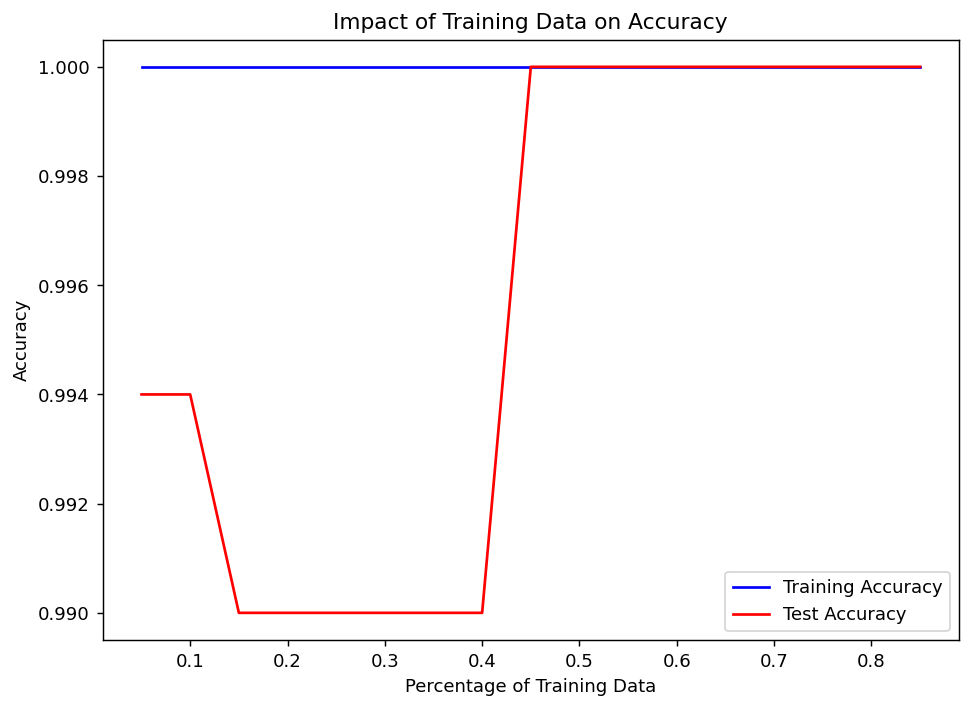

In [9]:
# =============================
#  Train Perceptron Model
# =============================

nb_epoch = 110  # Number of training iterations
l_rate = 0.05  # Learning rate
weights = np.array([0.2, 1.0, -1.0])  # Initial weights

Percentages = np.arange(0.05, 0.9, 0.05)
FinalTrainingAcc, FinalTestAcc = np.zeros(len(Percentages)), np.zeros(len(Percentages))

for i, per in enumerate(Percentages):
    subset_size = int(per * TrainingData.shape[0])
    SubsetTrainData, SubsetTrainLabels = TrainingData[:subset_size], TrainingLabels[:subset_size]
    Matrix = np.c_[SubsetTrainData, SubsetTrainLabels]
    TestMatrix = np.c_[TestData, TestLabels]

    for epoch in range(nb_epoch):
        weights = UpdateWeights(Matrix, weights, l_rate)

    FinalTrainingAcc[i] = accuracy(Matrix, weights)
    FinalTestAcc[i] = accuracy(TestMatrix, weights)

# =============================
#  Plot Accuracy vs Training Data
# =============================

plt.figure(figsize=(8.5, 6), dpi=130)
plt.plot(Percentages, FinalTrainingAcc, color='blue', label='Training Accuracy')
plt.plot(Percentages, FinalTestAcc, color='red', label='Test Accuracy')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Impact of Training Data on Accuracy')
plt.show()